## Composizione geografica e per settori degli ETF
Gestisce ETF di:
 * Vanguard
 * iShares

In [81]:
# prompt: importa  tutti i file excel contenuti contenuti nella cartella ETF,  per ognuno di questi file posizionati nella cartella all'interno del file excel chiamata "Partecipazioni",
# poi elimina le prime 7 righe, la riga 8 è le intestazioni di colonna, importa il contenuto della tabella sottostante in un dataframe e diventa il nuovo indice la colonna del filename

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [82]:
colori = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
    '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a',
    '#ffff99', '#b15928', '#8dd3c7', '#ffffb3', '#bebada',
    '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5'
]

In [83]:
# Load the ISO 3166 country codes dataset from GitHub
url = "https://raw.githubusercontent.com/jumping2000/Quants/refs/heads/main/utilities/ISO1366.csv"
df_iso1366 = pd.read_csv(url)
dict_iso1366 = dict(zip(df_iso1366['alpha-2'], df_iso1366['adjusted_name']))
print(dict_iso1366)

{'AF': 'Afghanistan', 'AX': 'Isole Åland', 'AL': 'Albania', 'DZ': 'Algeria', 'AS': 'Samoa Americane', 'AD': 'Andorra', 'AO': 'Angola', 'AI': 'Anguilla', 'AQ': 'Antartide', 'AG': 'Antigua e Barbuda', 'AR': 'Argentina', 'AM': 'Armenia', 'AW': 'Aruba', 'AU': 'Australia', 'AT': 'Austria', 'AZ': 'Azerbaigian', 'BS': 'Bahamas', 'BH': 'Bahrain', 'BD': 'Bangladesh', 'BB': 'Barbados', 'BY': 'Bielorussia', 'BE': 'Belgio', 'BZ': 'Belize', 'BJ': 'Benin', 'BM': 'Bermuda', 'BT': 'Bhutan', 'BO': 'Bolivia', 'BQ': 'Bonaire', 'BA': 'Bosnia-Erzegovina', 'BW': 'Botswana', 'BV': 'Isola Bouvet', 'BR': 'Brasile', 'IO': "Territori Britannici dell'Oceano Indiano", 'BN': 'Brunei', 'BG': 'Bulgaria', 'BF': 'Burkina Faso', 'BI': 'Burundi', 'CV': 'Capo Verde', 'KH': 'Cambogia', 'CM': 'Camerun', 'CA': 'Canada', 'KY': 'Isole Cayman', 'CF': 'Repubblica Centrafricana', 'TD': 'Ciad', 'CL': 'Cile', 'CN': 'Cina', 'CX': 'Isola Christmas', 'CC': 'Isole Cocos', 'CO': 'Colombia', 'KM': 'Comore', 'CG': 'Repubblica del Congo', 

In [84]:
# Load the GICS (Global Industry Classification Standard) codes dataset from GitHub
url = "https://raw.githubusercontent.com/jumping2000/Quants/refs/heads/main/utilities/GICS.csv"
df_gics = pd.read_csv(url)
dict_gics = dict(zip(df_gics['Vanguard'], df_gics['iShares']))
print(dict_gics)

{'Technology': 'IT', 'Consumer Discretionary': 'Consumi Discrezionali', 'Telecommunications': 'Comunicazione', 'Health Care': 'Salute', 'Financials': 'Finanziari', 'Energy': 'Energia', 'Consumer Staples': 'Generi di largo consumo', 'Basic Materials': 'Materiali', 'Industrials': 'Industriali', 'Utilities': 'Imprese di servizi di pubblica utilità', 'Real Estate': 'Immobili'}


In [85]:
import json
import requests
import urllib.parse

# CARICA i files excel da mio github
response = requests.get("https://api.github.com/repos/jumping2000/Quants/git/trees/main?recursive=1")
json_response = json.loads(response.text)
##
etf_data = {}
for branch in json_response["tree"]:
  if ("etf_data" in branch["path"] ) and "xlsx" in branch["path"]:
      filename = "https://raw.githubusercontent.com/jumping2000/Quants/main/" + urllib.parse.quote(branch["path"])
      print(filename)
      etf_name = filename[filename.rfind("/")+1:-5]
      #dfs.append(pd.read_csv(filename,index_col=0,skiprows=1,header=0,names=["Date",filename[filename.rfind("/")+1:-4].replace("%20"," ")]))
      if "iShares" in filename:
          df = pd.read_excel(filename, sheet_name="Partecipazioni", skiprows=7)
          df["ETF"] = etf_name  # Aggiungi una colonna con il nome del file
          df = df.set_index("ETF")
          df.rename(columns={"Ticker dell'emittente": "Ticker"}, inplace=True)
          df.rename(columns={"Valore di mercato": "Valore_mercato"}, inplace=True)
          df.rename(columns={"Ponderazione (%)": "Ponderazione"}, inplace=True)
          df.rename(columns={"Valore nozionale": "Valore_nozionale"}, inplace=True)
          df.rename(columns={"Area Geografica": "Area_geografica"}, inplace=True)
          df.rename(columns={"Valuta di mercato": "Valuta"}, inplace=True)
      elif "Vanguard" in filename:
          df = pd.read_excel(filename, sheet_name="Dati delle partecipazioni", skiprows=6)
          df["ETF"] = etf_name  # Aggiungi una colonna con il nome del file
          df = df.set_index("ETF")
          df["Prezzo"] = df["Valore di mercato"] / df["Azioni"]
          df['Regione'] = df['Regione'].replace(dict_iso1366)
          df['Settore'] = df['Settore'].replace(dict_gics)
          df.rename(columns={"Nome delle partecipazioni": "Nome"}, inplace=True)
          df.rename(columns={"Valore di mercato": "Valore_mercato"}, inplace=True)
          df.rename(columns={"% del valore di mercato": "Ponderazione"}, inplace=True)
          df.rename(columns={"Azioni": "Nominale"}, inplace=True)
          df.rename(columns={"Regione": "Area_geografica"}, inplace=True)
      etf_data[etf_name] = df

https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/Vanguard-VWCE.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-EIMI.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-IFSW.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-IPRE.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-ISAC.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-IUSN.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-IWMO.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-IWVL.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-SMEA.xlsx
https://raw.githubusercontent.com/jumping2000/Quants/main/etf_data/iShares-SWDA.xlsx


In [86]:
# Crea un DataFrame vuoto per raccogliere i dati di tutti i file Excel
df_etf = pd.DataFrame()
# Itera attraverso il dizionario di DataFrame e concatena i dati
for filename, df in etf_data.items():
  df_etf = pd.concat([df_etf, df], ignore_index=False)

In [102]:
# prompt: crea grafici a torta con il dataframe df_etf  che rappresenta il "valore_mercato" per "area_geografica", va creato un grafico a torta per ogni valore del campo indice "ETF",
# i grafici a torta vanno inseriti almeno due affiancati, gli altri a seguire se ci sono. Inoltre visualizza solo le prime 20 aree geografiche il resto classificalo come 'Altro'

## Crea grafici a torta per tutti i singoli ETF caricati
def create_pie_charts(df_etf, top_n_areas, settore):
  """Crea grafici a torta per ogni ETF, mostrando la distribuzione del valore di mercato per area geografica.
  Args:
      df_etf: Il DataFrame contenente i dati ETF.
      top_n_areas: Il numero di aree geografiche da visualizzare esplicitamente.
      Le aree rimanenti saranno raggruppate come "Altro".
  """
  etf_list = df_etf.index.unique()
  num_charts = len(etf_list)
  num_cols = 2
  num_rows = math.ceil(num_charts / num_cols)
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))
  axes = axes.flatten()  # Appiattisci la matrice di axes
  if settore == True:
      for i, etf in enumerate(etf_list):
          df_etf_current = df_etf.loc[[etf]]
          sector_weights = df_etf_current.groupby('Settore')['Ponderazione'].sum()
          sector_weights = sector_weights.sort_values(ascending=False)
          if not sector_weights.empty:
              axes[i].pie(sector_weights, labels=sector_weights.index, autopct='%1.1f%%', startangle=90, labeldistance=1.05, pctdistance=0.9, colors = colori)
              axes[i].set_title(f"Distribuzione per Settore - ETF: {etf}")
          else:
            print(f"Nessun dato disponibile per l'ETF: {etf}")
  else:
      for i, etf in enumerate(etf_list):
          df_etf_current = df_etf.loc[[etf]]
          area_weights = df_etf_current.groupby('Area_geografica')['Ponderazione'].sum()
          if not area_weights.empty:
              top_areas = area_weights.nlargest(top_n_areas).index
              other_areas = area_weights.loc[~area_weights.index.isin(top_areas)].sum()
              area_weights_filtered = area_weights.loc[top_areas]
              if other_areas > 0:
                area_weights_filtered['Altro'] = other_areas
              axes[i].pie(area_weights_filtered, labels=area_weights_filtered.index, autopct='%1.1f%%', startangle=90, labeldistance=1.05, pctdistance=0.9, colors = colori)
              axes[i].set_title(f"Distribuzione per Area Geografica - ETF: {etf}")
              #axes[i].axis('equal')
              #axes[i].legend(loc='lower left',fontsize=9)
          else:
            print(f"Nessun dato disponibile per l'ETF: {etf}")

  # Rimuovi gli assi extra se non sono necessari
  for j in range(num_charts, num_rows * num_cols):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()


## Grafici per paese

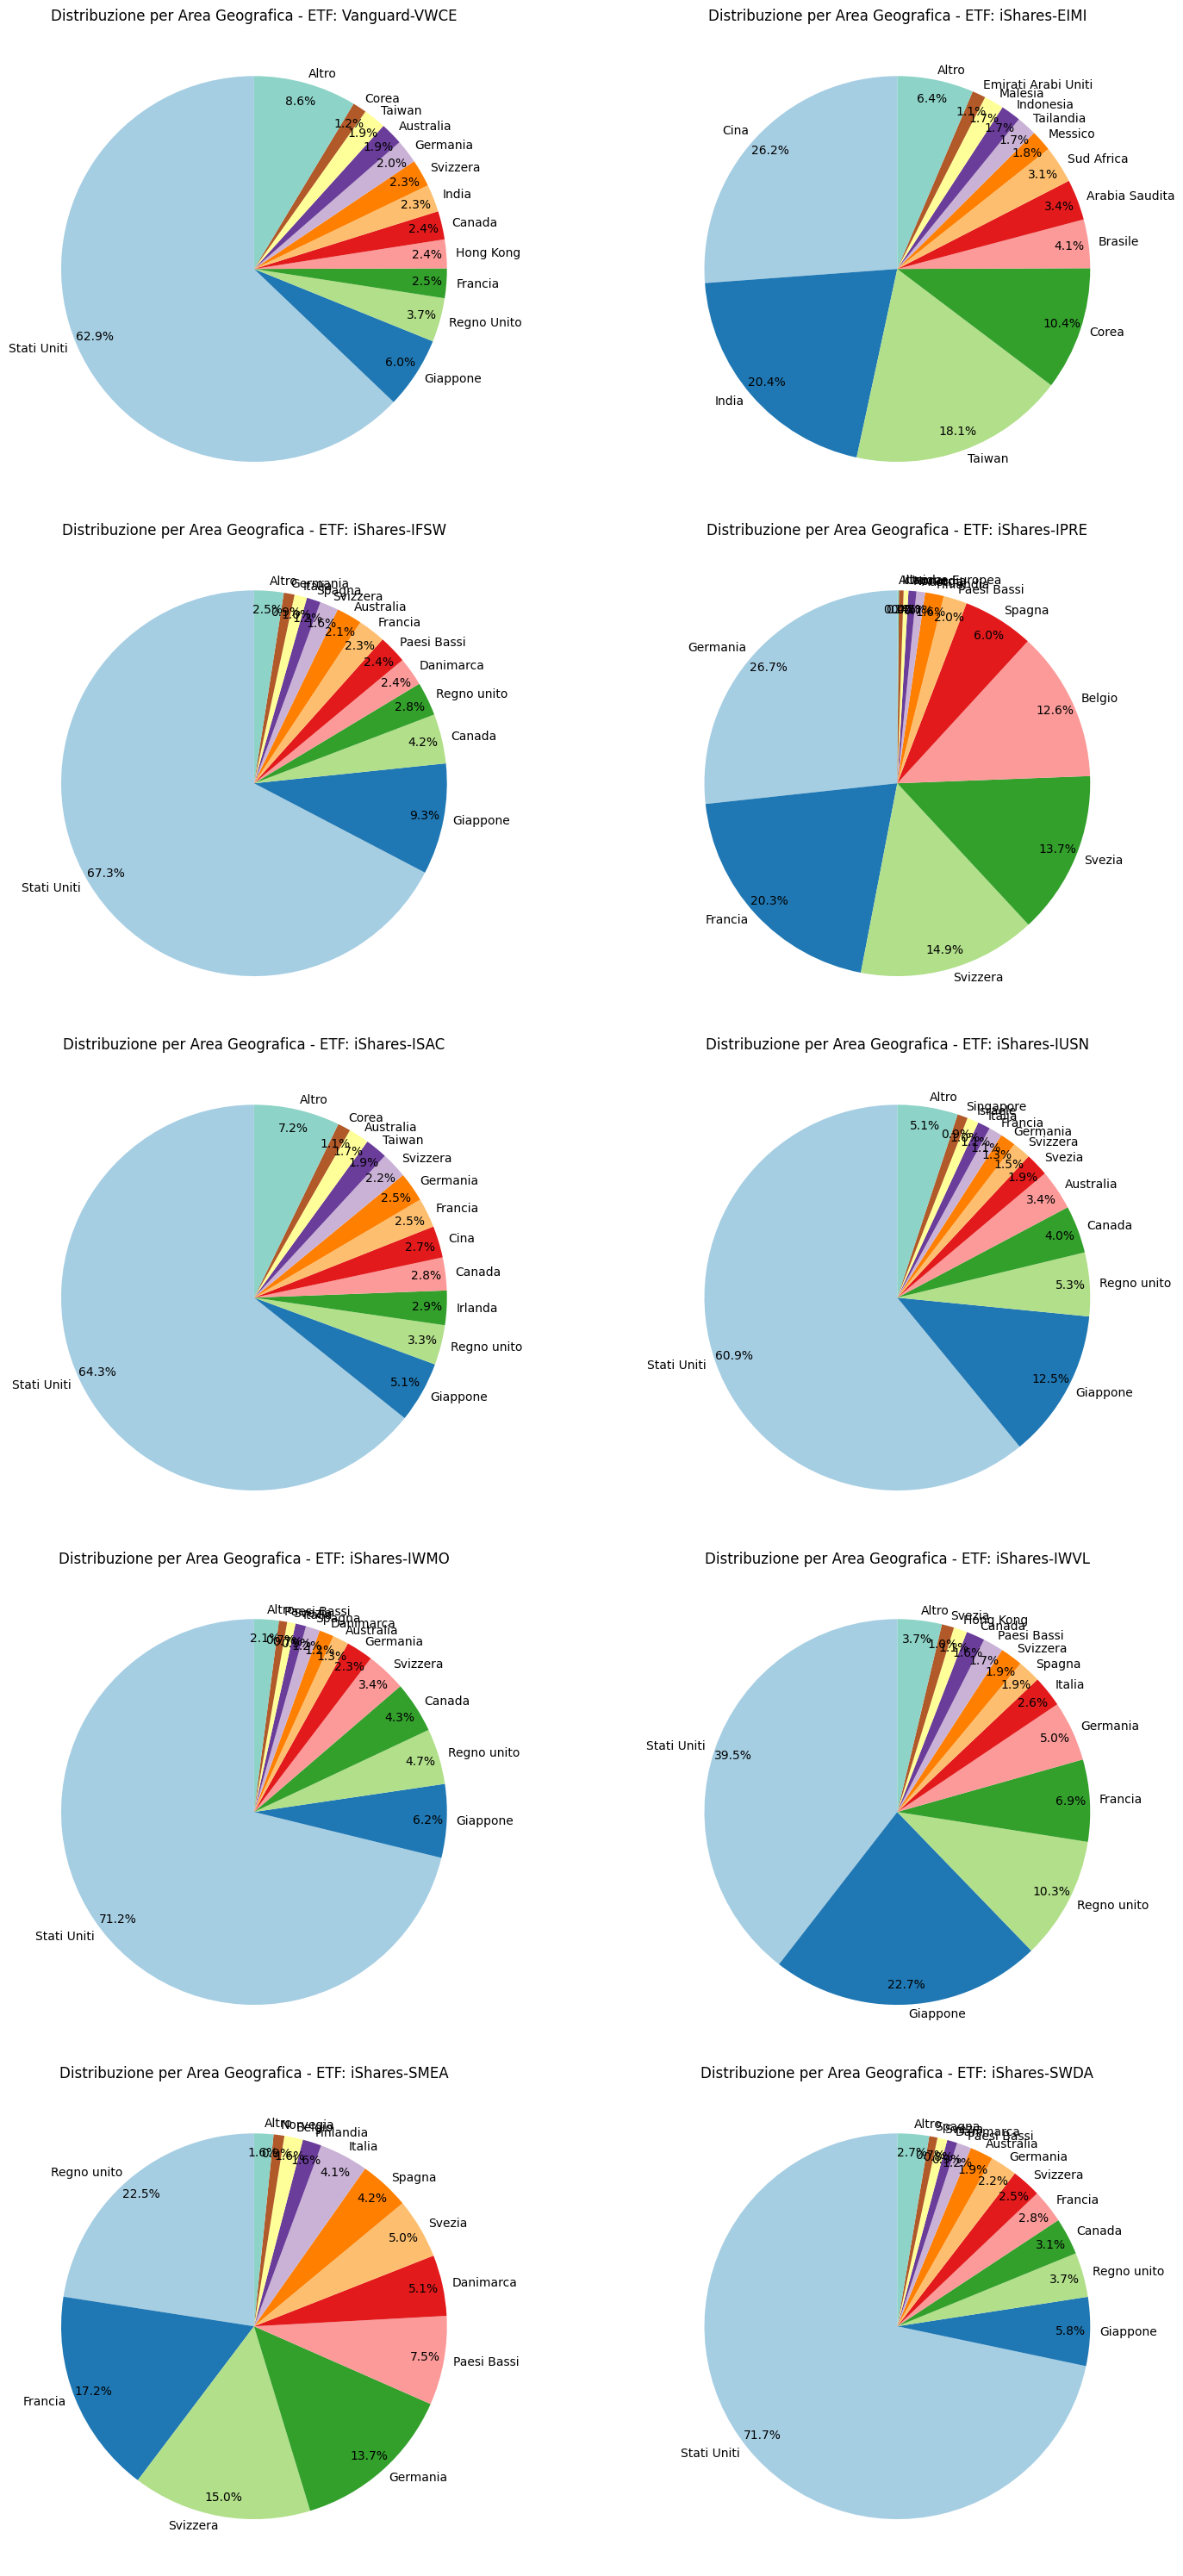

In [103]:
# Crea i grafici a torta
areas = 12 ## Visualizza le % dei primi N paesi, i rimaneneti sono classificati come altro
create_pie_charts(df_etf, areas, False)

## Grafici per settore

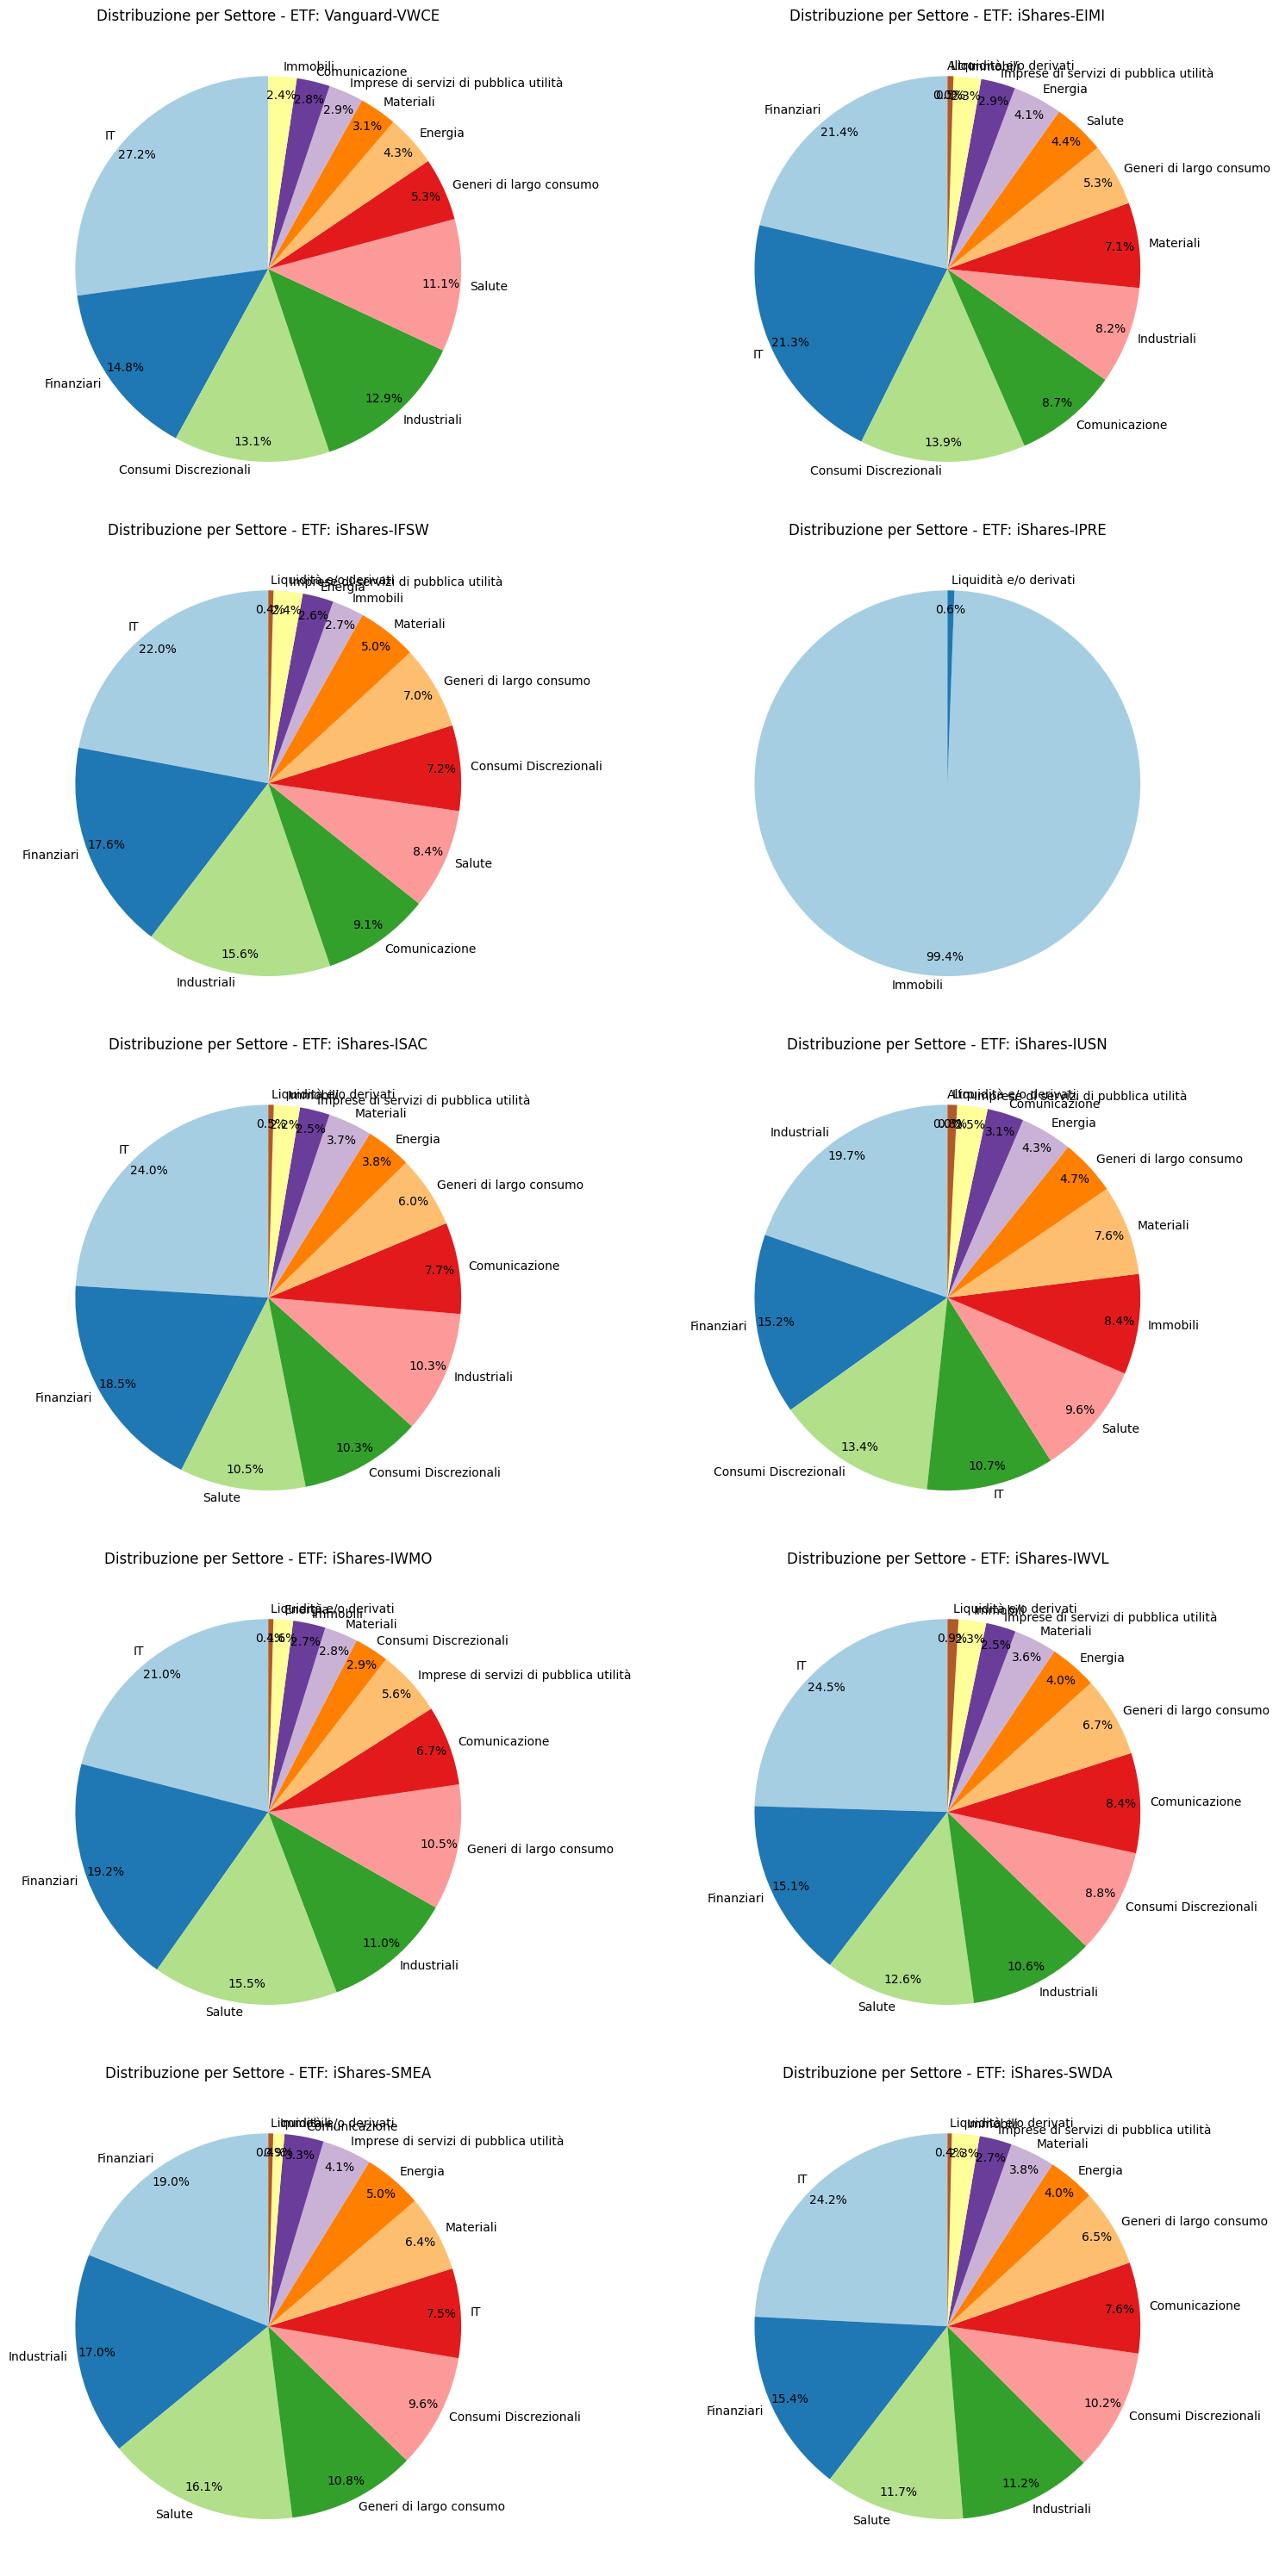

In [104]:
# Crea i grafici a torta per settore
create_pie_charts(df_etf, areas, True)


In [97]:
# prompt: dato il dataframe df_etf e un vettore che rappresenta il peso percentuale degli etf contenuti all'interno del dataframe costruisci
# un nuovo dataframe "Portfolio"con tutte le colonne di df_etf ma ha come colonna "Ponderazione" la media pesata del ticker per il vettore  delpeso percentuale

## Creo un portafoglio con i pesi
def weighted_portfolio(df_etf, etf_weights):
  """
  Crea un nuovo DataFrame "Portfolio" con la ponderazione media pesata
  per ogni ticker in base al vettore di pesi degli ETF.
  Args:
      df_etf: Il DataFrame contenente i dati degli ETF.
      etf_weights: Un dizionario o una Series con i pesi percentuali degli ETF.
  Returns:
      Un nuovo DataFrame "Portfolio" con la ponderazione media pesata per ticker
  """
  portfolio_df = pd.DataFrame()
  for etf_name, weight in etf_weights.items():
    if etf_name in df_etf.index.get_level_values('ETF').unique():
      etf_data = df_etf.loc[[etf_name]] #.copy()  # Copia il DataFrame per evitare modifiche al DataFrame originale
      etf_data['Ponderazione'] = etf_data['Ponderazione'] * weight
      portfolio_df = pd.concat([portfolio_df, etf_data], axis=0)
  # Raggruppa per Ticker e calcola la media pesata della Ponderazione
  portfolio_df = portfolio_df.groupby(['Ticker','ETF']).agg({'Ponderazione': 'sum', 'Area_geografica': 'first', 'Settore': 'first', 'Valuta': 'first'})
  return portfolio_df


################################################################################
# Esempio di utilizzo, da variare:
#
etf_weights = {
    'iShares-SWDA': 0.50,
    'iShares-EIMI': 0.15,
    'iShares-SMEA': 0.1,
    'iShares-IUSN': 0.15,
    'iShares-IPRE': 0.1
}
################################################################################
# Sum the values of the dictionary
total_sum = sum(etf_weights.values())

# Check if the sum is equal to 1
if total_sum == 1:
    print("Procedo alla creazione del dataframe!!")
    df_portfolio = weighted_portfolio(df_etf, etf_weights)
else:
    print(f"La somma dei pesi è {total_sum}, controlla!")

#df_portfolio.loc[df_portfolio.index=='AAPL']


Procedo alla creazione del dataframe


In [100]:
# Raggruppa i dati per Area Geografica e calcola la somma delle ponderazioni
area_weights_pf = df_portfolio.groupby('Area_geografica')['Ponderazione'].sum()
N_area = 15
top_areas = area_weights_pf.nlargest(N_area).index
other_areas = area_weights_pf.loc[~area_weights_pf.index.isin(top_areas)].sum()
area_weights_pf_filtered = area_weights_pf.loc[top_areas]
if other_areas > 0:
  area_weights_pf_filtered['Altro'] = other_areas
area_weights_pf_filtered = area_weights_pf_filtered.sort_values(ascending=False)
print(area_weights_pf_filtered)

Area_geografica
Stati Uniti    45.041351
Altro           9.201033
Francia         5.449213
Germania        5.442292
Regno unito     4.944702
Giappone        4.756672
Svizzera        4.464920
Cina            3.960488
India           3.066374
Taiwan          2.715355
Svezia          2.574174
Canada          2.118175
Paesi Bassi     1.629336
Belgio          1.609859
Corea           1.554687
Australia       1.447603
Name: Ponderazione, dtype: float64


In [99]:
# Raggruppa i dati per Settore e calcola la somma delle ponderazioni
sector_weights_pf = df_portfolio.groupby('Settore')['Ponderazione'].sum()
sector_weights_pf_sorted = sector_weights_pf.sort_values(ascending=False)
print(sector_weights_pf_sorted)


Settore
IT                                        17.650229
Finanziari                                14.986735
Immobili                                  12.803227
Industriali                               11.488312
Consumi Discrezionali                     10.158003
Salute                                     9.696061
Comunicazione                              5.901857
Generi di largo consumo                    5.820051
Materiali                                  4.688028
Energia                                    3.757362
Imprese di servizi di pubblica utilità     2.555217
Liquidità e/o derivati                     0.470927
Altro                                      0.000227
Name: Ponderazione, dtype: float64


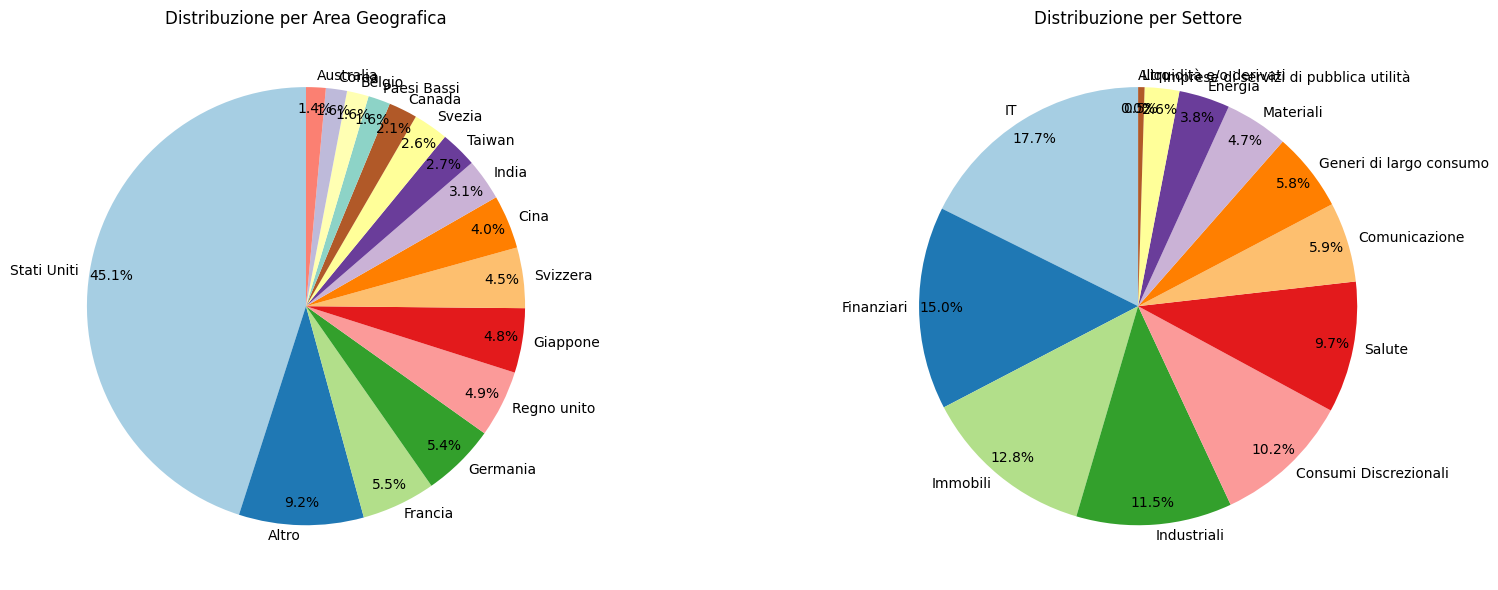

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Grafico a torta per area geografica
axes[0].pie(area_weights_pf_filtered, labels=area_weights_pf_filtered.index, autopct='%1.1f%%', startangle=90, labeldistance=1.05, pctdistance=0.9, colors = colori)
axes[0].set_title("Distribuzione per Area Geografica")
# Grafico a torta per settore
axes[1].pie(sector_weights_pf_sorted, labels=sector_weights_pf_sorted.index, autopct='%1.1f%%', startangle=90, labeldistance=1.05, pctdistance=0.9, colors = colori)
axes[1].set_title("Distribuzione per Settore")
##
plt.tight_layout()
plt.show()


In [93]:
# #etf_area_counts = df_etf.groupby(['ETF', 'Area_geografica'])['Ticker'].count().unstack() ## per numero ticker
# etf_area_counts = df_etf.groupby(['ETF', 'Area_geografica'])['Valore_mercato'].sum().unstack() # per valore di mercato
